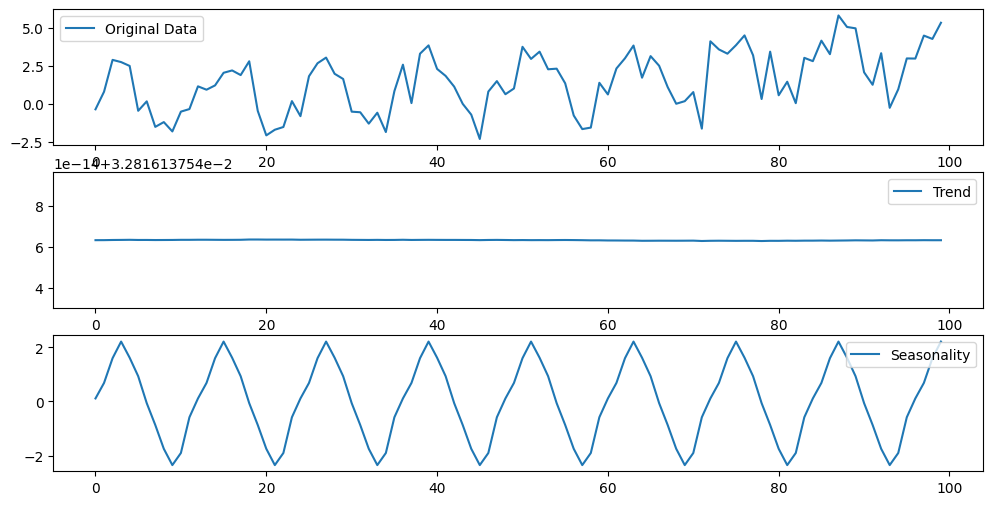

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Function to generate synthetic time series data with trends and seasons
def generate_time_series(timesteps, trend_coef, seasonal_coef, season_period):
    time = np.arange(timesteps)
    trend = trend_coef * time
    season = seasonal_coef * np.sin(2 * np.pi * time / season_period)
    noise = np.random.normal(0, 1, timesteps)
    time_series = trend + season + noise
    return time_series

# Simulate time series data
timesteps = 100
trend_coef = 0.03
seasonal_coef = 2.0
season_period = 12
simulated_data = generate_time_series(timesteps, trend_coef, seasonal_coef, season_period)

# Separating trends and seasons using Holt-Winters method
def separate_trend_season(data):
    model = ExponentialSmoothing(data, trend="add", seasonal="add", seasonal_periods=season_period)
    model_fit = model.fit(optimized=True)
    trend = model_fit.trend
    season = model_fit.season
    return trend, season

trend, season = separate_trend_season(simulated_data)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(simulated_data, label='Original Data')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(season, label='Seasonality')
plt.legend()

plt.show()
